# Scikit-Learn: Generalized Linear Models

Notebook Author: Matthew Kearns

The following methods assume a linear relationship between the input features and the response variable. They are regression methods because they predict a real-valued (continuous) output. Logistic regression can be used for classification when the target variable is categorical.

Notebook Contents:
    
    - Ordinary least squares
    - Ridge regression
    - Lasso
    - Elastic net
    - Least angle regression
    - Logistic regression
    - Stochastic gradient descent
    - Polynomial regression using basis functions

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ordinary least squares

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Creating deviations from y = x
error_train = 5 * np.random.random(50) - 2.5
error_test = 5 * np.random.random(50) - 2.5

# Create data to train model
X_train = np.linspace(0, 10, 50)
y_train = X_train + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test + error_test

In [51]:
# Fitting a linear regression model to the training data
model = LinearRegression()
model.fit(X_train[:, np.newaxis], y_train)

# Predicting new values from trained model
y_pred = model.predict(X_test[:, np.newaxis])

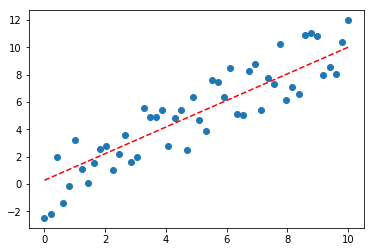

In [53]:
# Plotting the test data and the model
fig = None
fig = plt.scatter(X_test, y_test)
fig = plt.plot(X_test, y_pred, 'r--')
fig = plt.show()

In [57]:
# Displaying the model parameters estimated by the model
print("slope:", model.coef_)
print("y-intercept:", model.intercept_)

slope: [0.97259888]
y-intercept: 0.2762294762255504


### Ridge regression

Ridge regression imposes a penalty on the size of the coefficients determined by minimizing the RSS (residual sum of squares), which tackles the problem of collinearity not handled by OLS above.

In [269]:
from sklearn.linear_model import Ridge

In [270]:
# Creating deviations from y = x
error_train = 5 * np.random.random(100) - 2.5
error_test = 5 * np.random.random(100) - 2.5

# Create data to train model
X_train = np.linspace(0, 10, 100)
y_train = X_train + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test + error_test

In [271]:
# Initializing the model
ridge_model = Ridge(alpha=0.5)

# Now let's fit our model to the training data
ridge_model.fit(X_train[:, np.newaxis], y_train)

# Predicting y from test data with trained model
y_ridge = ridge_model.predict(X_train[:, np.newaxis])

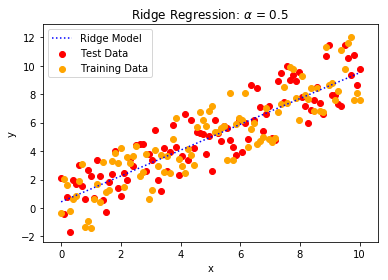

In [293]:
# Visualizing the differences between OLS and Ridge
fig = None
fig = plt.scatter(X_test, y_test, color='red', label='Test Data')
fig = plt.scatter(X_train, y_train, color='orange', label='Training Data')
fig = plt.plot(X_test, y_ridge, 'b:', label='Ridge Model')
fig = plt.xlabel('x')
fig = plt.ylabel('y')
fig = plt.title(r'Ridge Regression: $\alpha$ = 0.5')
fig = plt.legend()
fig = plt.show()

In [273]:
# Display model parameter estimates
print("Ridge slope:", ridge_model.coef_)
print("Ridge y-intercept", ridge_model.intercept_)

Ridge slope: [0.90759278]
Ridge y-intercept 0.4334555765630572


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


### Lasso

In [296]:
from sklearn.linear_model import Lasso

In [297]:
# Creating deviations from y = x
error_train = 5 * np.random.random(100) - 2.5
error_test = 5 * np.random.random(100) - 2.5

# Create data to train model
X_train = np.linspace(0, 10, 100)
y_train = X_train + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test + error_test

In [298]:
# Initializing the model
lasso_model = Lasso(alpha=0.1)

# Now let's fit our model to the training data
lasso_model.fit(X_train[:, np.newaxis], y_train)

# Predicting y from test data with trained model
y_lasso = lasso_model.predict(X_train[:, np.newaxis])

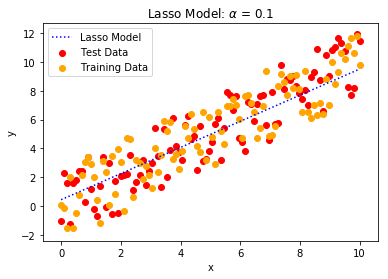

In [299]:
# Visualizing the differences between OLS and Ridge
fig = None
fig = plt.scatter(X_test, y_test, color='red', label='Test Data')
fig = plt.scatter(X_train, y_train, color='orange', label='Training Data')
fig = plt.plot(X_test, y_ridge, 'b:', label='Lasso Model')
fig = plt.xlabel('x')
fig = plt.ylabel('y')
fig = plt.title(r'Lasso Model: $\alpha$ = 0.1')
fig = plt.legend()
fig = plt.show()

In [ ]:
# Displaying the estimated model parameters
print("Lasso slope:", lasso_model.coef_)
print("Lasso y-intercept", lasso_model.intercept_)